# California Housing Price Prediction

## Context
The data contains information from the 1990 California census. So, although it may not help you with predicting current housing prices, it does provide an accessible introduction dataset for teaching people about the basics of machine learning.

## Features
The data pertains to the houses found in a given California district and some summary stats based on the 1990 census data. Be warned that the data aren’t cleaned, so some preprocessing steps are required! The columns are as follows, and their names are pretty self-explanatory:
* longitude
* latitude
* Housing median age
* total_rooms
* total_bedrooms
* population
* households
* median_income
* median house value
* ocean_proximity

## Acknowledgments
This data was initially featured in the following paper:
Pace, R. Kelley, and Ronald Barry. "Sparse spatial autoregressions." Statistics & Probability Letters 33.3 (1997): 291-297.

## Contents
1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

# 1. Business Problem Understanding

**Context**

This dataset contains housing data from California, USA, based on the 1990 census. It includes demographic information (income, population, house occupancy), geographical details (latitude, longitude), and general house characteristics (number of rooms, number of bedrooms, house age).

**Problem Statement**

Real estate developers face challenges in setting the right housing prices and choosing the best locations for new developments. Developers want to avoid mismatches, such as building luxury homes in low-income areas or ordinary homes in high-income neighborhoods. These mismatches can negatively impact property sales.

**Goals**

The goal of this project is to predict house prices in California using various features. Factors such as the number of rooms, location, and average population income can help improve prediction accuracy. Accurate price predictions will enable developers to align their offerings with market demand, maximize profits, and reach their target audience effectively.

**Analytical Approach**

We will analyze the dataset to identify patterns and features that distinguish properties. After that, a model will be developed to predict house prices. This predictive tool will assist developers in determining appropriate prices and ideal locations for housing projects.

**Metric Evaluation**

The evaluation metrics that I'm going to use for this project are:

* RMSE (Root Mean Squared Error): Measures the square root of the average squared error.

* MAE (Mean Absolute Error): Measures the average of absolute errors.

* MAPE (Mean Absolute Percentage Error): Measures the average percentage error.


In [2]:
#Library
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from IPython.display import display

# Feature Engineering
from sklearn.preprocessing import OneHotEncoder


# Model Selection
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")



In [3]:
#Load Dataset
df = pd.read_csv(r'data_california_house.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0


# 2. Data Understanding

In [4]:
# Count and Datatype for each Column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14448.000000,14448.000000,14448.000000,14448.000000,14311.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,-119.566647,35.630093,28.618702,2640.132683,538.260709,1425.157323,499.508929,3.866667,206824.624516
std,2.006587,2.140121,12.596694,2191.612441,423.577544,1149.580157,383.098390,1.891158,115365.476182
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1451.000000,295.000000,784.000000,279.000000,2.570600,119600.000000
50%,-118.490000,34.260000,29.000000,2125.000000,435.000000,1165.000000,410.000000,3.539100,180000.000000
75%,-118.000000,37.710000,37.000000,3148.000000,647.000000,1724.000000,604.000000,4.736100,263900.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,longitude,float64,0,0.00,806,"[-121.97, -119.38]"
1,latitude,float64,0,0.00,836,"[39.82, 38.97]"
2,housing_median_age,float64,0,0.00,52,"[48.0, 40.0]"
3,total_rooms,float64,0,0.00,5227,"[1399.0, 2898.0]"
4,total_bedrooms,float64,137,0.95,1748,"[558.0, 404.0]"
5,population,float64,0,0.00,3498,"[618.0, 108.0]"
6,households,float64,0,0.00,1649,"[892.0, 2.0]"
7,median_income,float64,0,0.00,9797,"[7.1382, 3.5719]"
8,ocean_proximity,object,0,0.00,5,"[NEAR OCEAN, <1H OCEAN]"
9,median_house_value,float64,0,0.00,3548,"[169800.0, 304000.0]"


In [7]:
#check for duplicate
df.duplicated().sum()

np.int64(0)

In [8]:
#check for missing values
df.isnull().sum().sort_values(ascending=False)

total_bedrooms        137
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

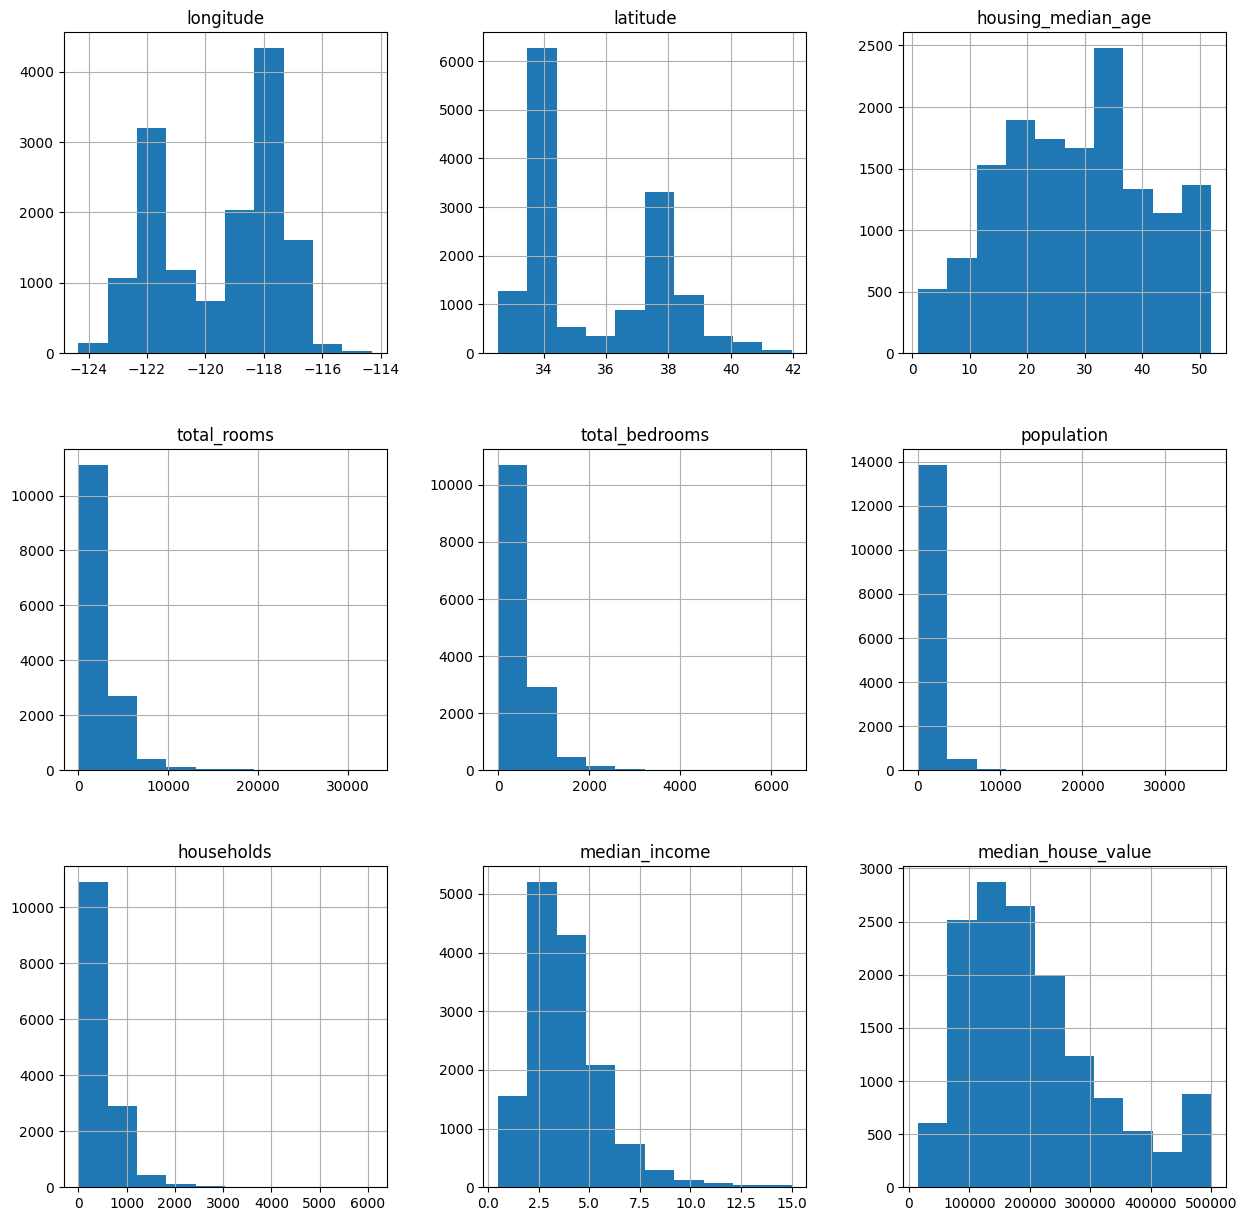

In [9]:
#Distribution of Features in the Dataset
df.hist()
fig = plt.gcf()
fig.set_size_inches(15, 15)

In [10]:
# Check skewness for all numerical columns in the DataFrame
skewness = df.skew(numeric_only=True)  # Specify numeric_only=True to avoid warnings in future versions

# Display the skewness values
print("Skewness of Numerical Columns:")
print(skewness)

Skewness of Numerical Columns:
longitude            -0.303734
latitude              0.471492
housing_median_age    0.058929
total_rooms           3.982992
total_bedrooms        3.386742
population            5.457554
households            3.345723
median_income         1.629086
median_house_value    0.981754
dtype: float64


* Longitude & Latitude: longitude and latitude show the geographical distribution of the areas. The values cluster around specific ranges, reflecting major population centers in California.

* Housing Median Age: Most houses are between 15 and 35 years old, with a notable spike near 50 years (likely older houses).


* Median Income: Distribution is relatively normal, with most incomes ranging between $2 and $6.

* Median House Value: Shows a right-skewed distribution, with most values under $300,000. There’s a cap at $500,000, likely due to data limits.

Highly skewed:

* Total Rooms: Highly skewed; most properties have fewer than 5,000 rooms. A few outliers have over 20,000 total rooms.

* Total Bedrooms: Similar to total rooms, this is also highly skewed. Most properties have fewer than 1,000 bedrooms.

* Population: The majority of areas have populations below 5,000. Some areas have populations exceeding 30,000, indicating outliers.

* * Households: Most areas have fewer than 1,000 households, with fewer areas exceeding 2,000.

# 3. Data Preprocessing

In [11]:
from sklearn.impute import SimpleImputer

# Create an imputer object with strategy set to 'median'
imputer = SimpleImputer(strategy='median')

# Apply the imputer to the 'total_bedrooms' column
df['total_bedrooms'] = imputer.fit_transform(df[['total_bedrooms']])

In [12]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [13]:
# Statistik deskriptif
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,-119.566647,35.630093,28.618702,2640.132683,537.281561,1425.157323,499.508929,3.866667,206824.624516
std,2.006587,2.140121,12.596694,2191.612441,421.683154,1149.580157,383.098390,1.891158,115365.476182
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1451.000000,296.000000,784.000000,279.000000,2.570600,119600.000000
50%,-118.490000,34.260000,29.000000,2125.000000,435.000000,1165.000000,410.000000,3.539100,180000.000000
75%,-118.000000,37.710000,37.000000,3148.000000,645.000000,1724.000000,604.000000,4.736100,263900.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [14]:
# Distribusi ocean proximity
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     6369
INLAND        4576
NEAR OCEAN    1879
NEAR BAY      1622
ISLAND           2
Name: count, dtype: int64

In [15]:
ocean_df = df['ocean_proximity'].value_counts()

<Axes: xlabel='ocean_proximity'>

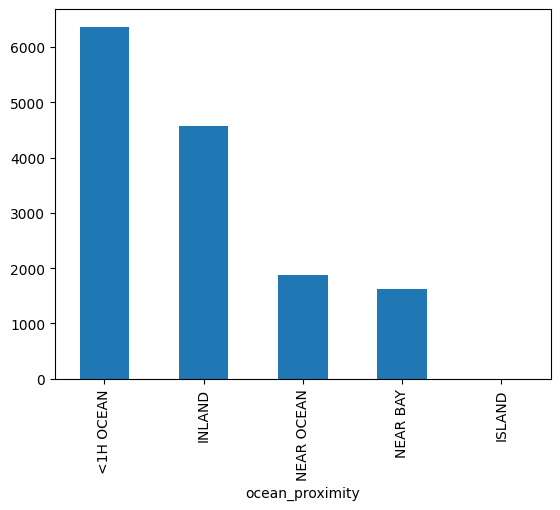

In [16]:
ocean_df.plot(kind='bar')

In [17]:
df.groupby('ocean_proximity')['median_house_value'].mean().sort_values(ascending=False)

ocean_proximity
ISLAND        351100.000000
NEAR BAY      258512.974723
NEAR OCEAN    249775.384247
<1H OCEAN     239652.436960
INLAND        125113.114510
Name: median_house_value, dtype: float64

In [18]:
df.groupby('ocean_proximity')['median_income'].mean().sort_values(ascending=False)

ocean_proximity
<1H OCEAN     4.224854
NEAR BAY      4.179790
NEAR OCEAN    4.014166
INLAND        3.197080
ISLAND        2.718750
Name: median_income, dtype: float64

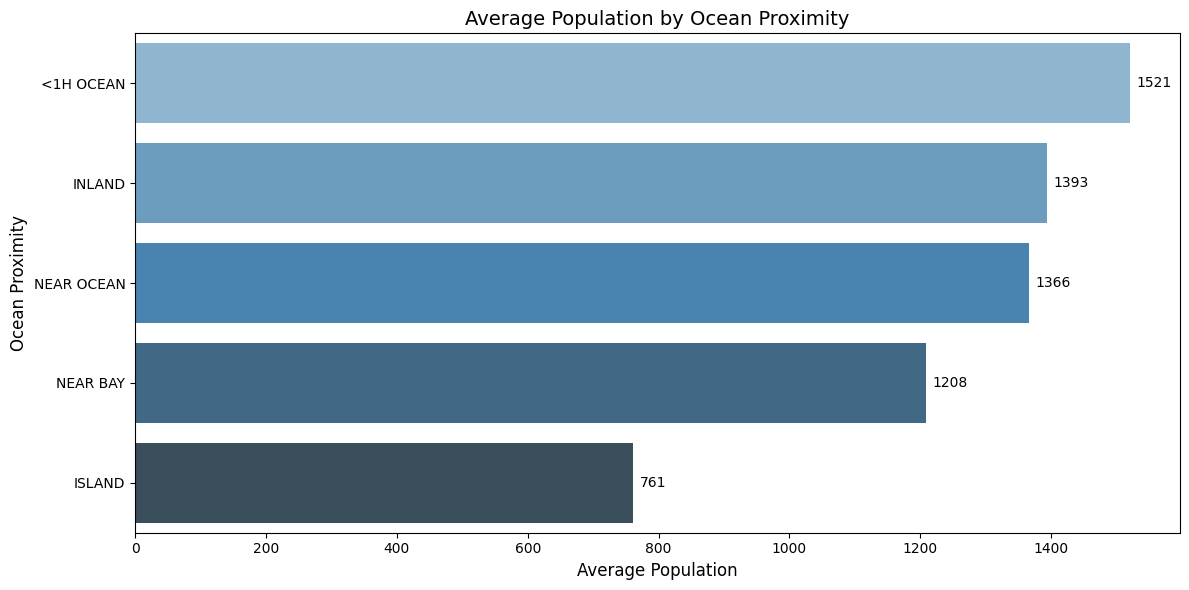

In [19]:
plt.figure(figsize=(12, 6))


sorted_df = df.groupby('ocean_proximity')['population'].mean().sort_values(ascending=False).reset_index()


sns.barplot(
    x='population', y='ocean_proximity', data=sorted_df, palette='Blues_d', ci=None
)

# To label each  bar
for i, value in enumerate(sorted_df['population']):
    plt.text(value + 10, i, f'{value:.0f}', va='center', fontsize=10)


plt.title('Average Population by Ocean Proximity', fontsize=14)
plt.xlabel('Average Population', fontsize=12)
plt.ylabel('Ocean Proximity', fontsize=12)


plt.tight_layout()
plt.show()

* Coastal areas (both <1H OCEAN and NEAR OCEAN) are generally more populated compared to other categories, likely due to better economic opportunities, climate, and urbanization.

* Island regions are the least populated, possibly due to accessibility issues and limited resources.

* Housing development in <1H OCEAN and INLAND regions might target larger populations, whereas projects in ISLAND or NEAR BAY areas could focus on smaller, niche markets.

In [20]:
df = pd.get_dummies(df, columns=['ocean_proximity'])

In [21]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,47500.0,False,True,False,False,False
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,100000.0,False,False,False,True,False
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,285800.0,True,False,False,False,False
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,175000.0,True,False,False,False,False
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,59200.0,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,144600.0,False,True,False,False,False
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,159400.0,False,True,False,False,False
14445,-121.90,36.58,31.0,1431.0,435.0,704.0,393.0,3.1977,289300.0,False,False,False,False,True
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,484600.0,True,False,False,False,False


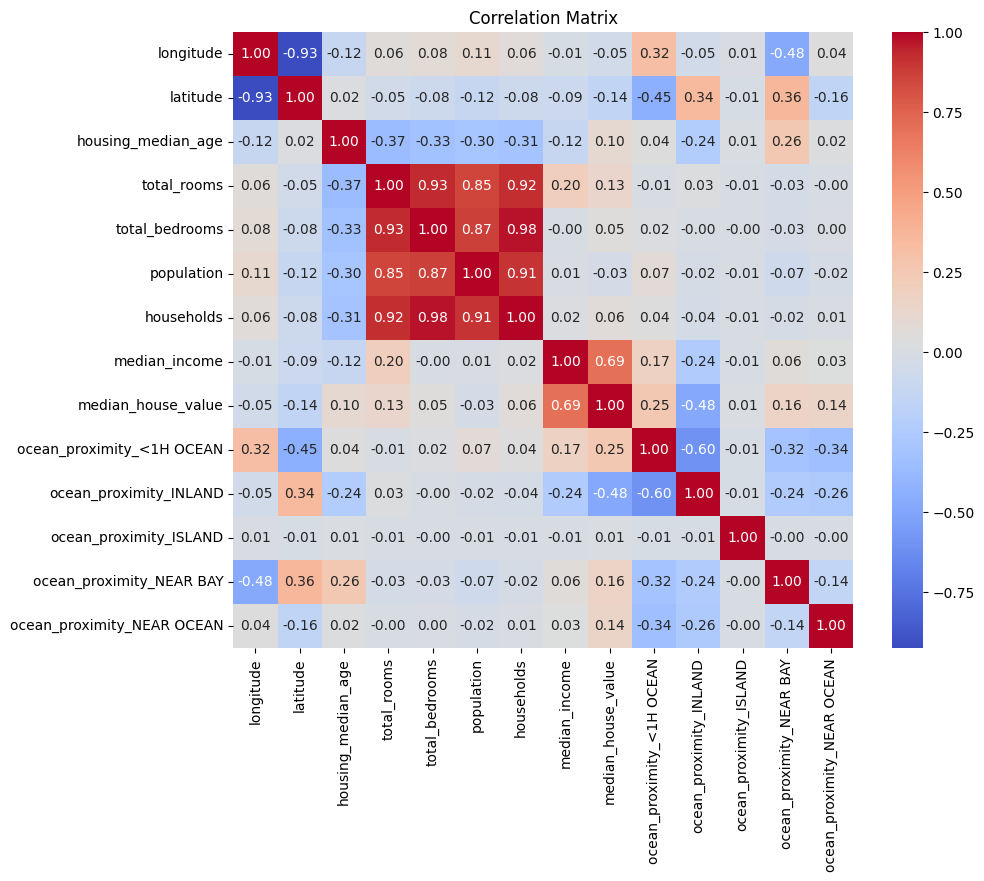

In [22]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

* Median_income has the strongest positive correlation (0.69) with house prices, indicating it is a significant predictor.
* Other features like total_rooms (0.13) and housing_median_age (0.10) show weak positive correlations.
* total_rooms, total_bedrooms, population, and households are highly correlated with each other (0.85–0.98), suggesting multicollinearity.
* longitude and latitude have a very high negative correlation (-0.93) suggests multicollinearity between these geographic features. You may only need one of these or can combine them into a single feature (e.g., clustering or distance to a central point).

Multicollinearity happens when two or more features (independent variables) in a dataset are highly correlated with each other. This means that the features provide overlapping or redundant information to the model (can reduce model performance).

In [23]:
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

* rooms_per_household: represents the average number of rooms per household in a given area,to help understand the housing density and living conditions in each area.

* bedrooms_per_room: calculates the proportion of bedrooms to total rooms, reflect house design and functionality

* population_per_household: measures the average population per household in a given area; provides insights into household size and occupancy rates, which are important for understanding housing demands



In [24]:
#  removing redundant features and retain key variables to improve model performance.

df = df.drop(['total_bedrooms', 'total_rooms', 'households', 'population'], axis=1)

In [25]:
from sklearn.cluster import KMeans

# Combine longitude and latitude into a single array
geo_features = df[['longitude', 'latitude']]

# Fit K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Choose the number of clusters
df['location_cluster'] = kmeans.fit_predict(geo_features)

df = df.drop(['latitude', 'longitude'], axis=1)

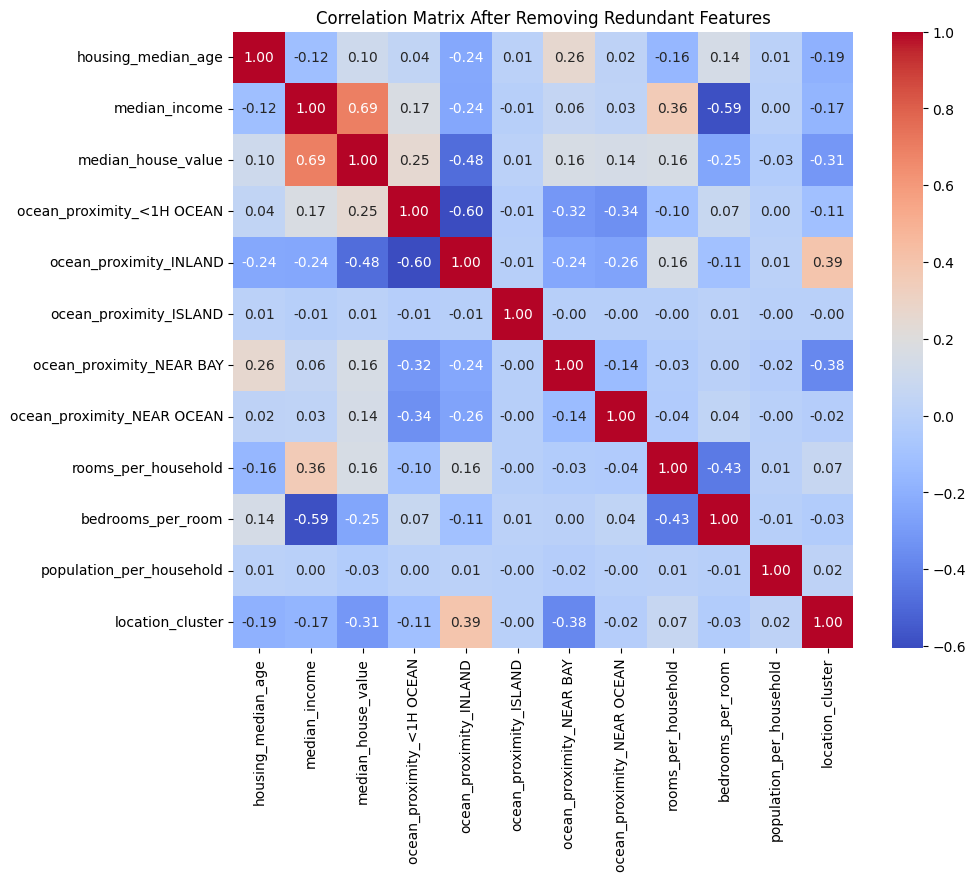

In [26]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix After Removing Redundant Features')
plt.show()

<Axes: >

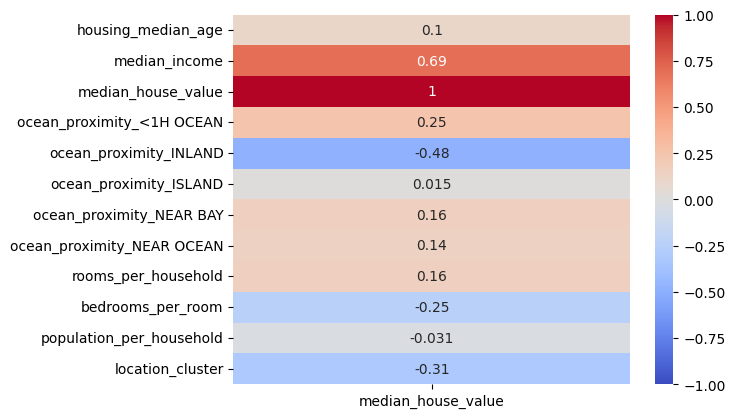

In [27]:
corr_subset = corr[['median_house_value']]
sns.heatmap(corr_subset, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

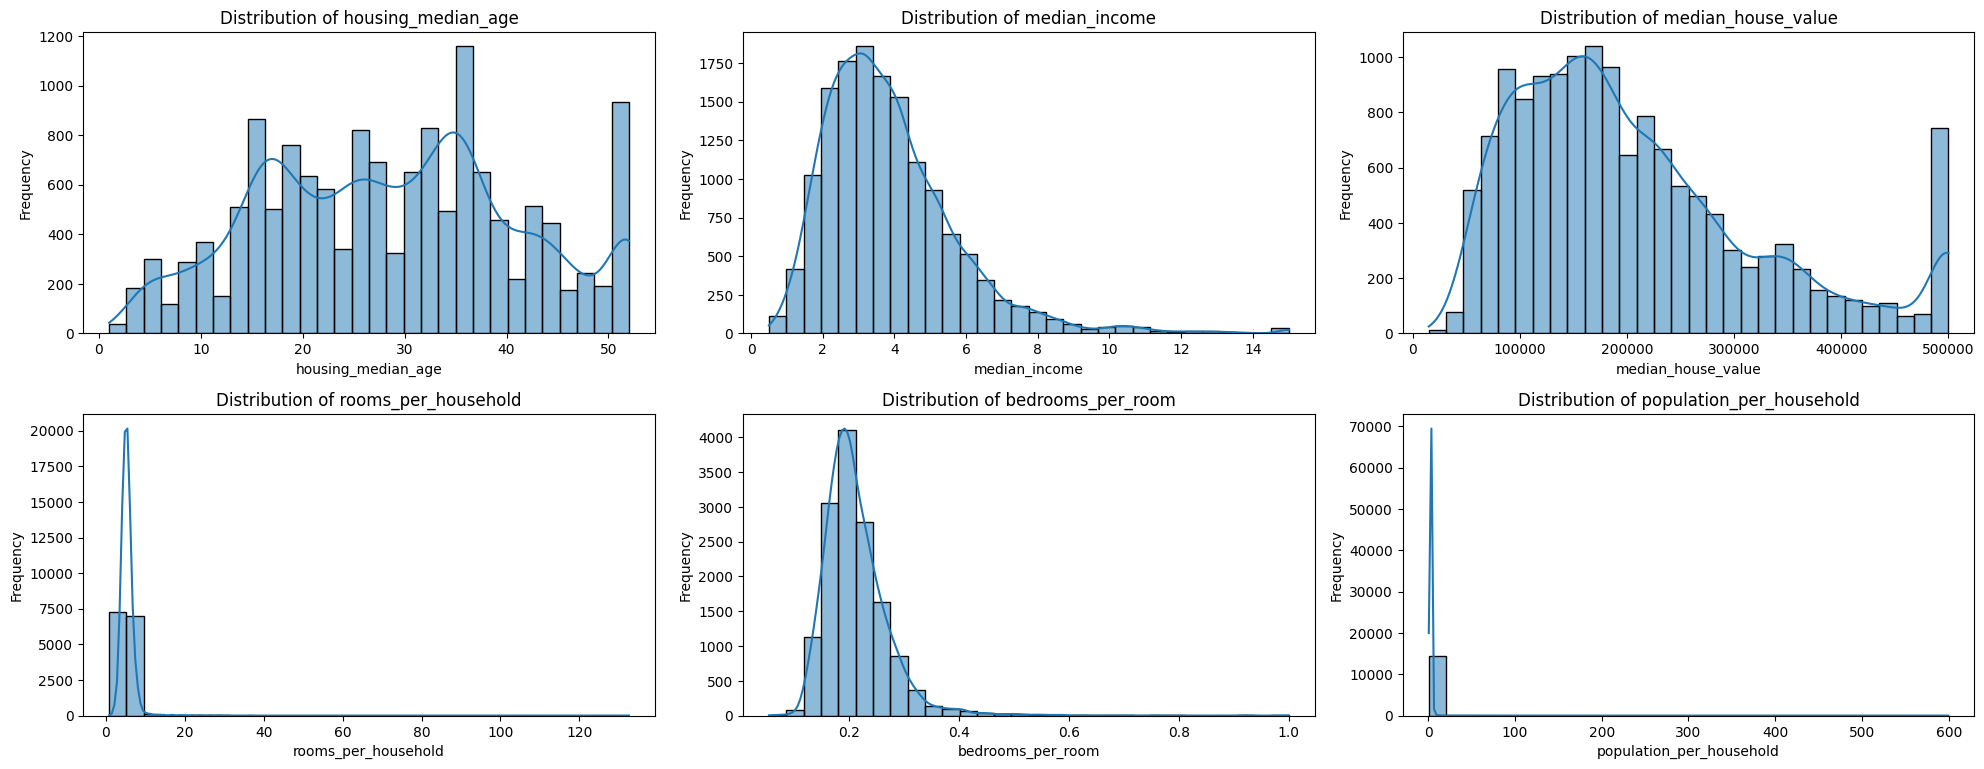

In [28]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Apply transformations to reduce skewness for features with high positive skewness (Log or Square Root Transformations)

In [29]:
# Log transformation for highly skewed features
df['normalized_rooms_per_household'] = np.log1p(df['rooms_per_household'])  # Log transformation for normalization
df['normalized_population_per_household'] = np.log1p(df['population_per_household'])

# Square root transformation for moderately skewed feature
df['adjusted_median_income'] = np.sqrt(df['median_income'])


df = df.drop(['rooms_per_household', 'population_per_household', 'median_income'], axis=1)

print("Applied transformations with stakeholder-friendly names.")


Applied transformations with stakeholder-friendly names.


Cap or remove extreme outliers for highly skewed features like rooms_per_household and population_per_household (Address Outliers).

In [30]:
# Define cap thresholds (99th percentile)
cap_threshold_rooms = df['normalized_rooms_per_household'].quantile(0.99)
cap_threshold_population = df['normalized_population_per_household'].quantile(0.99)

# Cap the outliers
df['normalized_rooms_per_household'] = np.where(
    df['normalized_rooms_per_household'] > cap_threshold_rooms,
    cap_threshold_rooms,
    df['normalized_rooms_per_household']
)

df['normalized_population_per_household'] = np.where(
    df['normalized_population_per_household'] > cap_threshold_population,
    cap_threshold_population,
    df['normalized_population_per_household']
)

print("Capped outliers for normalized features.")


Capped outliers for normalized features.


normalized_rooms_per_household: Represents log-transformed rooms_per_household for normalization.
normalized_population_per_household: Represents log-transformed population_per_household.
adjusted_median_income: Represents square root-transformed median_income.

Flag Capped House Values

In [31]:
# Apply capping to ensure values above 500,000 are capped
df['median_house_value'] = np.where(df['median_house_value'] > 500000, 500000, df['median_house_value'])

# Create a binary feature to flag capped house values
df['capped_value_flag'] = np.where(df['median_house_value'] == 500000, 1, 0)

print("Created a binary feature 'capped_value_flag' to flag capped house values.")



Created a binary feature 'capped_value_flag' to flag capped house values.


In [32]:
# Recalculate skewness for numerical columns
skewness_after = df.skew(numeric_only=True)

print("Skewness After Transformations:")
print(skewness_after)

Skewness After Transformations:
housing_median_age                      0.058929
median_house_value                      0.981751
ocean_proximity_<1H OCEAN               0.238411
ocean_proximity_INLAND                  0.788039
ocean_proximity_ISLAND                 84.985292
ocean_proximity_NEAR BAY                2.456672
ocean_proximity_NEAR OCEAN              2.199931
bedrooms_per_room                       2.598365
location_cluster                        1.199225
normalized_rooms_per_household         -0.133168
normalized_population_per_household     0.252853
adjusted_median_income                  0.674909
capped_value_flag                       4.220537
dtype: float64


Apply a log transformation to reduce skewness:

In [33]:
df['log_bedrooms_per_room'] = np.log1p(df['bedrooms_per_room'])

In [34]:
df.rename(columns={'log_bedrooms_per_room': 'bedroom_to_room_ratio_scaled'}, inplace=True)

df = df.drop(['bedrooms_per_room'], axis=1)

print("Renamed feature to 'bedroom_to_room_ratio_scaled' for better clarity.")

Renamed feature to 'bedroom_to_room_ratio_scaled' for better clarity.


In [35]:
# Merge ISLAND with NEAR OCEAN
df['ocean_proximity_NEAR OCEAN'] += df['ocean_proximity_ISLAND']
df = df.drop(['ocean_proximity_ISLAND'], axis=1)

print("Grouped ISLAND with NEAR OCEAN.")

Grouped ISLAND with NEAR OCEAN.


In [36]:
# Recalculate skewness for numerical columns
skewness_after = df.skew(numeric_only=True)

print("Skewness After Transformations:")
print(skewness_after)

Skewness After Transformations:
housing_median_age                     0.058929
median_house_value                     0.981751
ocean_proximity_<1H OCEAN              0.238411
ocean_proximity_INLAND                 0.788039
ocean_proximity_NEAR BAY               2.456672
ocean_proximity_NEAR OCEAN             2.198113
location_cluster                       1.199225
normalized_rooms_per_household        -0.133168
normalized_population_per_household    0.252853
adjusted_median_income                 0.674909
capped_value_flag                      4.220537
bedroom_to_room_ratio_scaled           1.896378
dtype: float64


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   housing_median_age                   14448 non-null  float64
 1   median_house_value                   14448 non-null  float64
 2   ocean_proximity_<1H OCEAN            14448 non-null  bool   
 3   ocean_proximity_INLAND               14448 non-null  bool   
 4   ocean_proximity_NEAR BAY             14448 non-null  bool   
 5   ocean_proximity_NEAR OCEAN           14448 non-null  bool   
 6   location_cluster                     14448 non-null  int32  
 7   normalized_rooms_per_household       14448 non-null  float64
 8   normalized_population_per_household  14448 non-null  float64
 9   adjusted_median_income               14448 non-null  float64
 10  capped_value_flag                    14448 non-null  int64  
 11  bedroom_to_room_ratio_scaled

In [38]:
df

,housing_median_age,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,location_cluster,normalized_rooms_per_household,normalized_population_per_household,adjusted_median_income,capped_value_flag,bedroom_to_room_ratio_scaled
0,52.0,47500.0,False,True,False,False,4,1.335001,1.762159,1.405347,0,0.223144
1,43.0,100000.0,False,False,True,False,0,1.541476,1.390797,1.503463,0,0.279537
2,17.0,285800.0,True,False,False,False,1,2.011968,1.570788,2.509781,0,0.155241
3,17.0,175000.0,True,False,False,False,1,1.257893,1.398964,1.311450,0,0.388645
4,50.0,59200.0,False,True,False,False,4,1.726822,1.532285,1.490168,0,0.224179
...,...,...,...,...,...,...,...,...,...,...,...,...
14443,20.0,144600.0,False,True,False,False,0,1.945910,1.447188,2.100595,0,0.160653
14444,27.0,159400.0,False,True,False,False,0,1.848342,1.409936,1.706898,0,0.160773
14445,31.0,289300.0,False,False,False,True,0,1.534978,1.026525,1.788211,0,0.265424
14446,34.0,484600.0,True,False,False,False,1,1.712102,1.177997,2.373078,0,0.210547


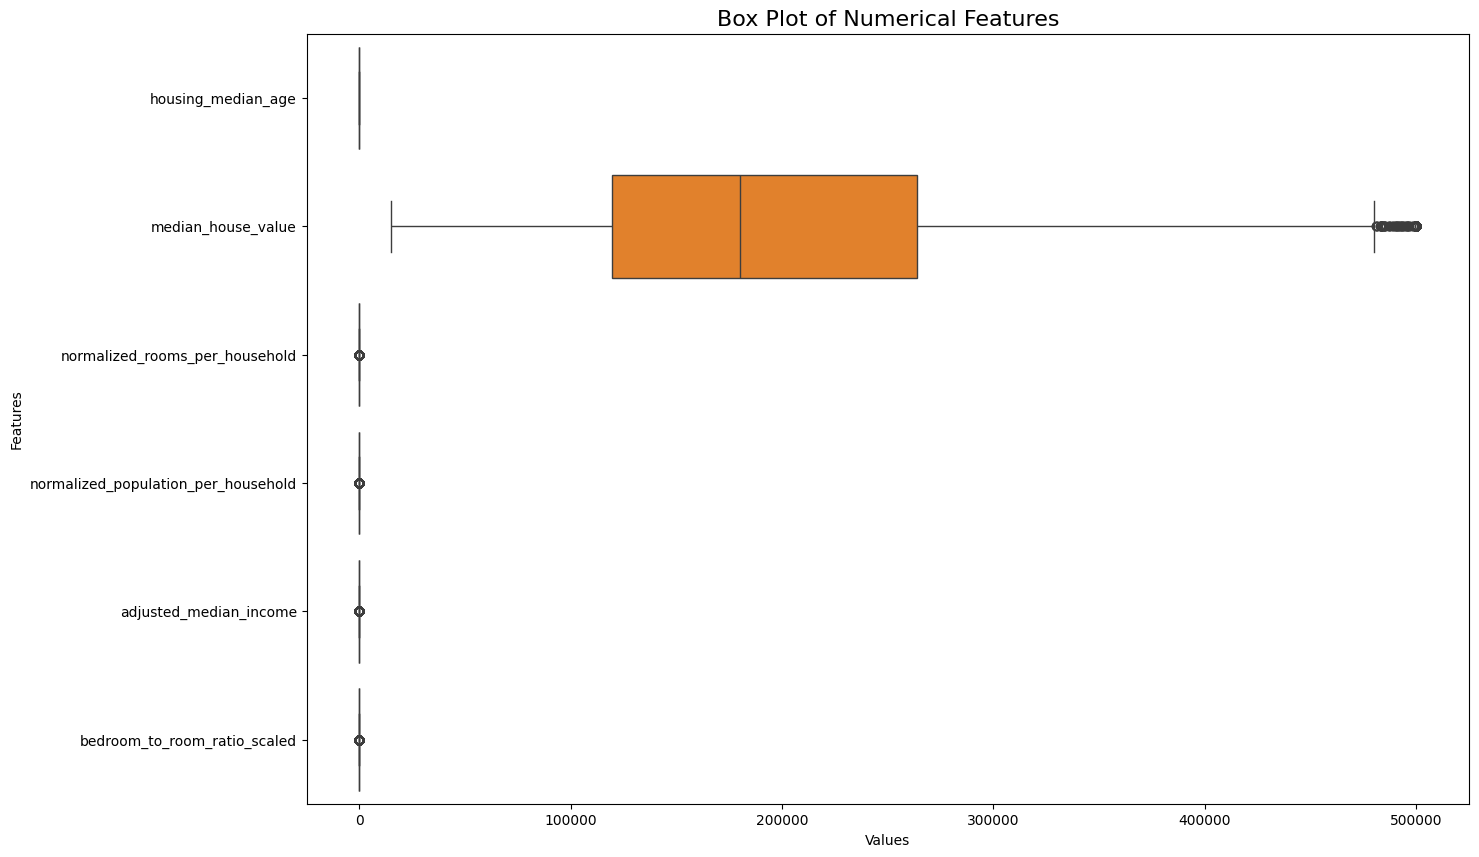

In [39]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df.select_dtypes(include=['float64']), orient='h')  # Select numerical columns only
plt.title("Box Plot of Numerical Features", fontsize=16)
plt.xlabel("Values")
plt.ylabel("Features")
plt.show()

In [40]:
print(df['median_house_value'].max()) 


500000.0


In [41]:
df['median_house_value'] = np.where(df['median_house_value'] > 500000, 500000, df['median_house_value'])


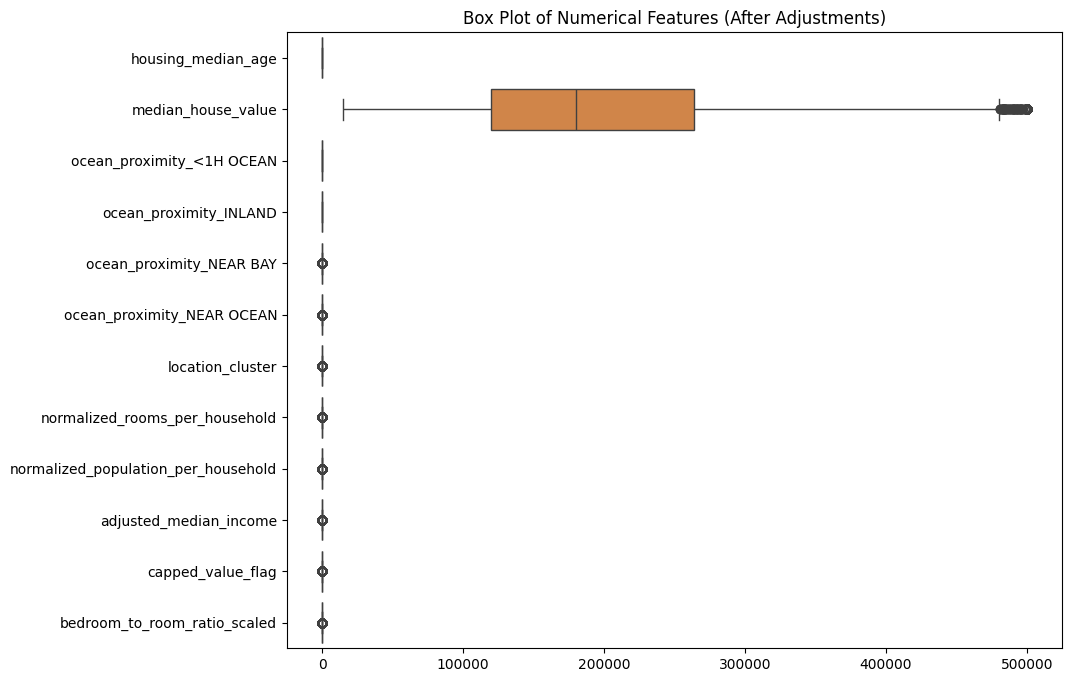

In [42]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, orient='h')
plt.title('Box Plot of Numerical Features (After Adjustments)')
plt.show()

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   housing_median_age                   14448 non-null  float64
 1   median_house_value                   14448 non-null  float64
 2   ocean_proximity_<1H OCEAN            14448 non-null  bool   
 3   ocean_proximity_INLAND               14448 non-null  bool   
 4   ocean_proximity_NEAR BAY             14448 non-null  bool   
 5   ocean_proximity_NEAR OCEAN           14448 non-null  bool   
 6   location_cluster                     14448 non-null  int32  
 7   normalized_rooms_per_household       14448 non-null  float64
 8   normalized_population_per_household  14448 non-null  float64
 9   adjusted_median_income               14448 non-null  float64
 10  capped_value_flag                    14448 non-null  int64  
 11  bedroom_to_room_ratio_scaled

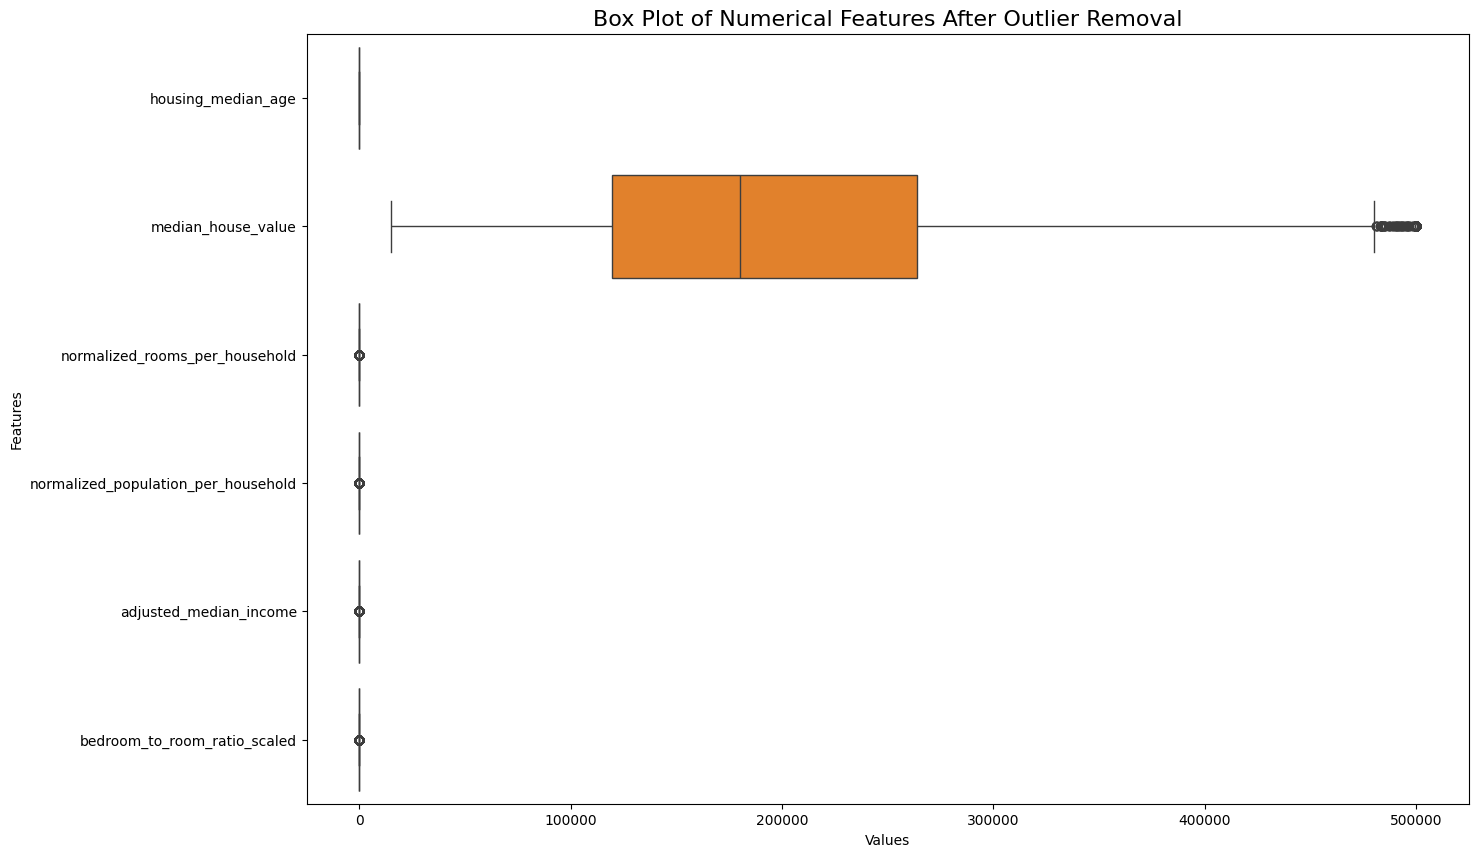

In [44]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df.select_dtypes(include=['float64']), orient='h')  # Only numerical columns
plt.title("Box Plot of Numerical Features After Outlier Removal", fontsize=16)
plt.xlabel("Values")
plt.ylabel("Features")
plt.show()

In [45]:
df.to_csv('data_california_clean.csv', index=False)

* To prepare the dataset for machine learning by clearly separating predictors and the variable to be predicted.
* Features (X): Includes variables such as median_income and other predictors that influence house prices.
* Target (y): Represents the house price (median_house_value), which the model will predict based on the features.

In [46]:
# Determining feature and target
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']



In [47]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)


After scaling, the mean of each feature will be approximately 0, and the standard deviation will be 1. The scaled values will be comparable.

In [48]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



* random_state=42: Ensures the split is reproducible. Using the same random_state will always produce the same train-test split.
* X_train, y_train: Used to train the model.
* X_test, y_test: Used to validate the model's performance.

# 4. Modeling

This set of code implements and evaluates multiple regression models, including Linear Regression, Ridge Regression, Lasso Regression, Random Forest Regression, and XGBoost for predicting a target variable. 

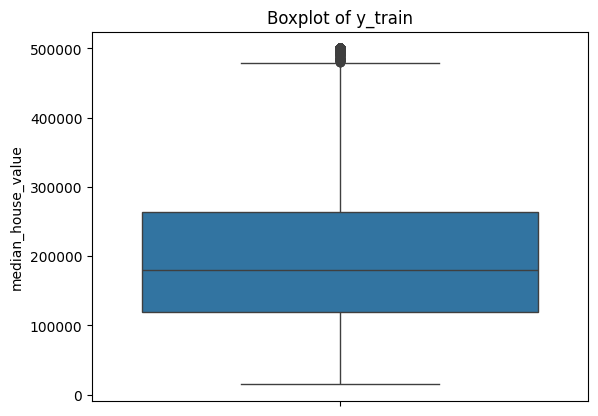

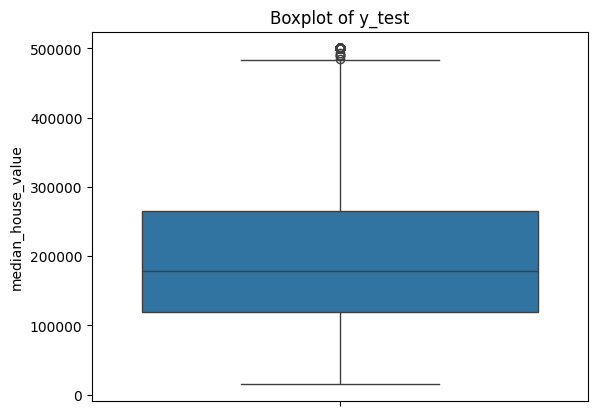

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check the distribution of the target variable
sns.boxplot(y_train)
plt.title('Boxplot of y_train')
plt.show()

# Check the distribution of the test target variable
sns.boxplot(y_test)
plt.title('Boxplot of y_test')
plt.show()


In [50]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_test - y_pred) / (y_test + 1e-10))) * 100

print('MSE: ', mse)
print('RMSE: ', rmse)
print('MAE: ', mae)
print('R2: ', r2)
print('MAPE: ', mape)

MSE:  3653456446.2995768
RMSE:  60443.82885208032
MAE:  45248.27758967958
R2:  0.7263535146781619
MAPE:  27.345460746180727


In [51]:
# Ridge regression
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=10.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

In [52]:
# Evaluation using ridge
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
mape_ridge = np.mean(np.abs((y_test - y_pred_ridge) / (y_test + 1e-10))) * 100
print('MSE: ', mse_ridge)
print('RMSE: ', rmse_ridge)
print('MAE: ', mae_ridge)
print('R2: ', r2_ridge)
print('MAPE: ', mape_ridge)

MSE:  3653276392.7757125
RMSE:  60442.33940521919
MAE:  45253.94604138419
R2:  0.7263670008151117
MAPE:  27.358316357889468


In [53]:
# Lasso regression
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

In [54]:
# Evaluation using lasso
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
mape_lasso = np.mean(np.abs((y_test - y_pred_lasso) / (y_test + 1e-10))) * 100
print('MSE: ', mse_lasso)
print('RMSE: ', rmse_lasso)
print('MAE: ', mae_lasso)
print('R2: ', r2_lasso)
print('MAPE: ', mape_lasso)

MSE:  3653232872.084355
RMSE:  60441.97938589002
MAE:  45252.58114424959
R2:  0.7263702605458363
MAPE:  27.356915478832867


In [55]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200,
                           max_depth=10,
                           min_samples_split=2,
                           min_samples_leaf=2
                           )
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [56]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mape_rf = np.mean(np.abs((y_test - y_pred_rf) / (y_test + 1e-10))) * 100
print('MSE: ', mse_rf)
print('RMSE: ', rmse_rf)
print('MAE: ', mae_rf)
print('R2: ', r2_rf)
print('MAPE: ', mape_rf)


MSE:  2656698588.434962
RMSE:  51543.172083554986
MAE:  35837.689177093576
R2:  0.8010113868960835
MAPE:  21.615434681400934


In [57]:
import xgboost as xgb
# Initialize the XGBoost Regressor model with default parameters
xgb_model = xgb.XGBRegressor(random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Calculate the evaluation metrics

# MSE (Mean Squared Error)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

# RMSE (Root Mean Squared Error)
rmse_xgb = np.sqrt(mse_xgb)

# MAE (Mean Absolute Error)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

# R² (Coefficient of Determination)
r2_xgb = r2_score(y_test, y_pred_xgb)

# MAPE (Mean Absolute Percentage Error)
mape_xgb = np.mean(np.abs((y_test - y_pred_xgb) / (y_test + 1e-10))) * 100  # Avoid division by zero

# Print the evaluation metrics
print('MSE: ', mse_xgb)
print('RMSE: ', rmse_xgb)
print('MAE: ', mae_xgb)
print('R2: ', r2_xgb)
print('MAPE: ', mape_xgb)

MSE:  2709687310.0705667
RMSE:  52054.65694892789
MAE:  36574.21581963668
R2:  0.7970424939722424
MAPE:  21.888361257534388


In [58]:
xgb_model = xgb.XGBRegressor(random_state=42)

xgb_model.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred = xgb_model.predict(X_train)

# Make predictions on the test data
y_pred_xgb = xgb_model.predict(X_test)

# Calculate the evaluation metrics for the training data
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
train_mape = np.mean(np.abs((y_train - y_train_pred) / (y_train + 1e-10))) * 100  # Avoid division by zero

# Calculate the evaluation metrics for the test data
test_mse = mean_squared_error(y_test, y_pred_xgb)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_pred_xgb)
test_r2 = r2_score(y_test, y_pred_xgb)
test_mape = np.mean(np.abs((y_test - y_pred_xgb) / (y_test + 1e-10))) * 100  # Avoid division by zero

# Print the evaluation metrics for both train and test data
print("Train MSE: ", train_mse)
print("Train RMSE: ", train_rmse)
print("Train MAE: ", train_mae)
print("Train R²: ", train_r2)
print("Train MAPE: ", train_mape)

print("\nTest MSE: ", test_mse)
print("Test RMSE: ", test_rmse)
print("Test MAE: ", test_mae)
print("Test R²: ", test_r2)
print("Test MAPE: ", test_mape)

Train MSE:  1027859312.1316724
Train RMSE:  32060.245041666047
Train MAE:  22781.209957388823
Train R²:  0.9227012626104099
Train MAPE:  13.42869017864421

Test MSE:  2709687310.0705667
Test RMSE:  52054.65694892789
Test MAE:  36574.21581963668
Test R²:  0.7970424939722424
Test MAPE:  21.888361257534388


In [59]:
from sklearn.model_selection import RandomizedSearchCV # to find the best configuration
# Define hyperparameters for XGBoost
param_grid = {
    'n_estimators': [100, 200, 500, 1000],            # Number of boosting rounds (trees)
    'learning_rate': [0.01, 0.05, 0.1, 0.2],          # Step size shrinking
    'max_depth': [3, 5, 7, 10],                    # Maximum depth of trees
    'min_child_weight': [1, 3, 5],                      # Minimum sum of instance weight in a child
    'subsample': [0.6, 0.8, 1.0],                       # Fraction of samples used for training each tree
    'colsample_bytree': [0.6, 0.8, 1.0],               # Fraction of features used for training each tree
    'gamma': [0, 0.1, 0.2, 0.3],                       # Minimum loss reduction required to make a further partition
    'reg_alpha': [0, 0.1, 1],                           # L1 regularization term on weights
    'reg_lambda': [0, 0.1, 1]                           # L2 regularization term on weights
}

# Initialize XGBoost Regressor
xgb_model = xgb.XGBRegressor(random_state=42)

# Initialize RandomizedSearchCV for hyperparameter tuning
xgb_random = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid,
                                n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)


# Perform hyperparameter tuning
xgb_random.fit(X_train, y_train)

# Get the best model
best_model = xgb_random.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters: ", xgb_random.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters:  {'subsample': 0.8, 'reg_lambda': 0.1, 'reg_alpha': 1, 'n_estimators': 1000, 'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 1.0}


In [60]:
best_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [61]:
y_pred_xgb = best_model.predict(X_test)

# Calculate evaluation metrics
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
mape_xgb = np.mean(np.abs((y_test - y_pred_xgb) / (y_test + 1e-10))) * 100

# Print evaluation metrics
print('MSE: ', mse_xgb)
print('RMSE: ', rmse_xgb)
print('MAE: ', mae_xgb)
print('R2: ', r2_xgb)
print('MAPE: ', mape_xgb)

MSE:  2480836763.679412
RMSE:  49807.99899292695
MAE:  34724.0443514814
R2:  0.8141835626025666
MAPE:  20.63013075358951


In [62]:
best_model.fit(X_train, y_train)


y_train_pred = best_model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

y_test_pred = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("Train MSE: ", train_mse)
print("Train RMSE: ", train_rmse)
print("Train R²: ", train_r2)

print("\nTest MSE: ", test_mse)
print("Test RMSE: ", test_rmse)
print("Test R²: ", test_r2)


train_mape = np.mean(np.abs((y_train - y_train_pred) / (y_train + 1e-10))) * 100
test_mape = np.mean(np.abs((y_test - y_test_pred) / (y_test + 1e-10))) * 100

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print("\nTrain MAPE: ", train_mape)
print("Test MAPE: ", test_mape)

print("\nTrain MAE: ", train_mae)
print("Test MAE: ", test_mae)



Train MSE:  2019568457.9426477
Train RMSE:  44939.609009677064
Train R²:  0.8481211484604325

Test MSE:  2480836763.679412
Test RMSE:  49807.99899292695
Test R²:  0.8141835626025666

Train MAPE:  18.573696090101596
Test MAPE:  20.63013075358951

Train MAE:  31835.256399450056
Test MAE:  34724.0443514814


In [63]:
X_test

array([[-0.84300442, -0.88788521,  1.46878952, ...,  0.26768261,
        -0.22496849, -0.14718628],
       [-0.76361577, -0.88788521, -0.68083274, ..., -1.69190126,
        -0.22496849,  1.30721399],
       [ 0.42721404,  1.12627172, -0.68083274, ...,  0.45761442,
        -0.22496849, -0.36960966],
       ...,
       [-0.44606115,  1.12627172, -0.68083274, ...,  0.96694334,
        -0.22496849, -0.96922841],
       [ 0.82415731,  1.12627172, -0.68083274, ..., -1.18767529,
        -0.22496849,  1.33414336],
       [ 0.26843673, -0.88788521,  1.46878952, ...,  0.16086523,
        -0.22496849,  0.09070404]])

In [64]:
# Predict using input data
data = [100, 200, 300, 2000, 1000, 200, 4000, 8000, 9000, 1000, 11]

In [65]:
data_pred = scaler.transform([data])
pred = best_model.predict(data_pred)
print('Predicted price: $ ', pred)

Predicted price: $  [472830.9]


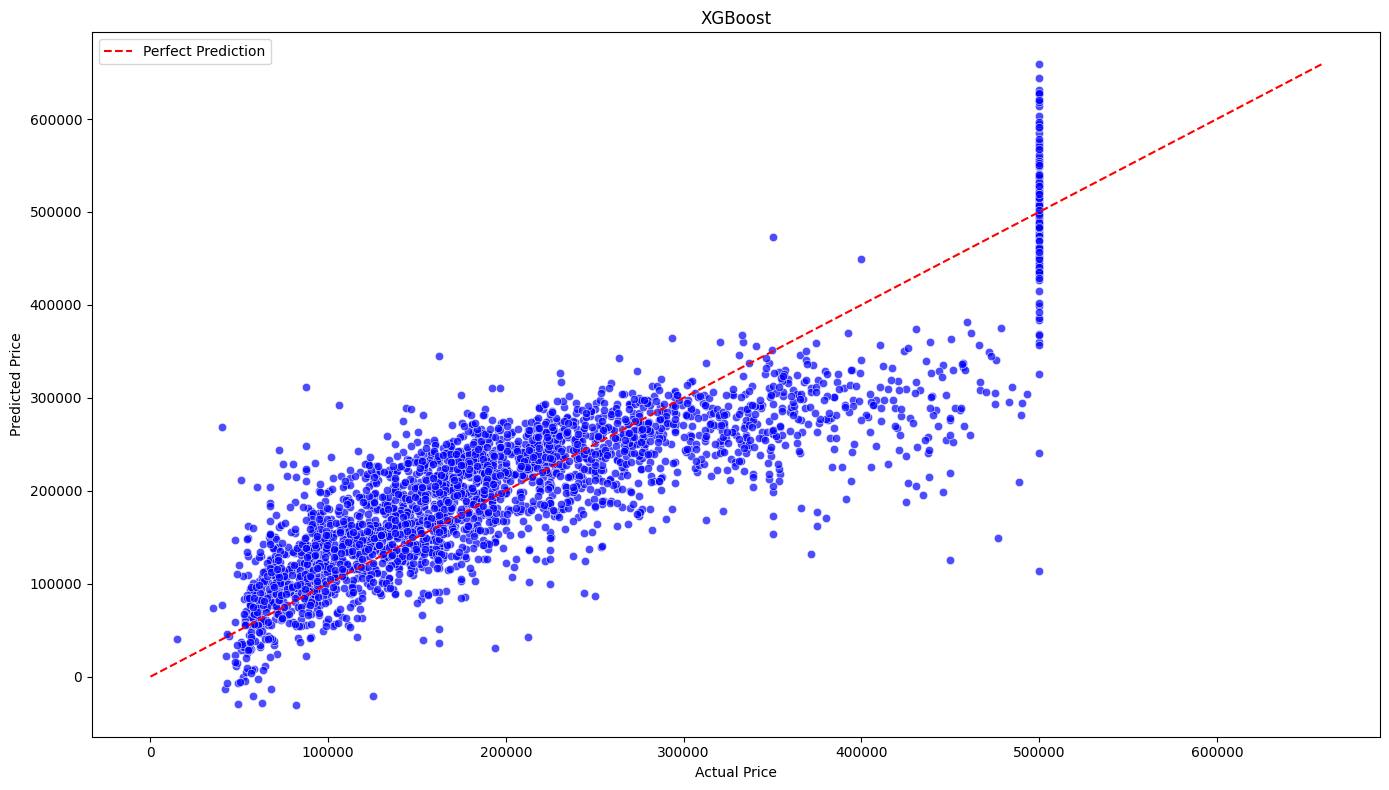

In [66]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.7).set(
    title='XGBoost',
    xlabel='Actual Price',
    ylabel='Predicted Price'
)

# Add diagonal line for reference
max_val = max(y_test.max(), y_pred.max())
plt.plot([0, max_val], [0, max_val], 'r--', label='Perfect Prediction')
plt.legend()

plt.tight_layout()
plt.show()


Overall Performance:
    
* The model demonstrates good predictive ability for the majority of the data, especially in the low to mid-range housing prices.
* The scatter plot shows a clear positive correlation between the actual and predicted values, indicating that the model has learned the patterns effectively.
* Points are clustered around the red "Perfect Prediction" line, showing the model understands the relationship between features and housing prices.
* Housing prices tend to be right-skewed, meaning there are many lower-priced houses and very few high-priced ones.
* The dataset likely has very few expensive homes compared to mid-range houses.

Model Improvement:

* Apply log transformation to reduce skewness and improve predictions for high prices.
* Add more examples of expensive homes to help the model learn better.
* Add more features such as proximity to schools, hospitals, and businesses, local employment rates or crime rates.






In [67]:
df

,housing_median_age,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,location_cluster,normalized_rooms_per_household,normalized_population_per_household,adjusted_median_income,capped_value_flag,bedroom_to_room_ratio_scaled
0,52.0,47500.0,False,True,False,False,4,1.335001,1.762159,1.405347,0,0.223144
1,43.0,100000.0,False,False,True,False,0,1.541476,1.390797,1.503463,0,0.279537
2,17.0,285800.0,True,False,False,False,1,2.011968,1.570788,2.509781,0,0.155241
3,17.0,175000.0,True,False,False,False,1,1.257893,1.398964,1.311450,0,0.388645
4,50.0,59200.0,False,True,False,False,4,1.726822,1.532285,1.490168,0,0.224179
...,...,...,...,...,...,...,...,...,...,...,...,...
14443,20.0,144600.0,False,True,False,False,0,1.945910,1.447188,2.100595,0,0.160653
14444,27.0,159400.0,False,True,False,False,0,1.848342,1.409936,1.706898,0,0.160773
14445,31.0,289300.0,False,False,False,True,0,1.534978,1.026525,1.788211,0,0.265424
14446,34.0,484600.0,True,False,False,False,1,1.712102,1.177997,2.373078,0,0.210547


Feature Importance

In [68]:
X_train

array([[ 0.10965942,  1.12627172, -0.68083274, ..., -0.28358422,
        -0.22496849,  0.8751649 ],
       [-0.84300442, -0.88788521,  1.46878952, ..., -0.96855377,
        -0.22496849,  0.08864973],
       [-1.31933634, -0.88788521, -0.68083274, ...,  0.25954733,
        -0.22496849,  0.6636388 ],
       ...,
       [ 1.6974325 ,  1.12627172, -0.68083274, ..., -0.21227472,
        -0.22496849,  0.11330172],
       [ 0.50660269, -0.88788521, -0.68083274, ...,  0.67582309,
        -0.22496849, -0.91112237],
       [-0.60483846, -0.88788521,  1.46878952, ..., -0.33039861,
        -0.22496849, -0.39026271]])

In [69]:
X

array([[ 1.8562098 , -0.88788521,  1.46878952, ..., -1.12931754,
        -0.22496849,  0.65497487],
       [ 1.14171192, -0.88788521, -0.68083274, ..., -0.91151727,
        -0.22496849,  1.84615244],
       [-0.92239307,  1.12627172, -0.68083274, ...,  1.32233823,
        -0.22496849, -0.77931627],
       ...,
       [ 0.18904808, -0.88788521, -0.68083274, ..., -0.27942345,
        -0.22496849,  1.54804209],
       [ 0.42721404,  1.12627172, -0.68083274, ...,  1.01888146,
        -0.22496849,  0.38890003],
       [-1.08117038, -0.88788521,  1.46878952, ..., -1.63350299,
        -0.22496849,  1.15762206]])

Feature Importance

In [70]:
# Determining feature and target
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = pd.DataFrame(X_train, columns=X.columns)

In [71]:
# FEATURE IMPORTANCE
# Get feature importances from the trained model
feature_importances = pd.Series(
    best_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

In [72]:
feature_importances

capped_value_flag                      0.566611
ocean_proximity_INLAND                 0.222456
adjusted_median_income                 0.111749
normalized_population_per_household    0.025132
ocean_proximity_NEAR OCEAN             0.014825
location_cluster                       0.013661
housing_median_age                     0.013383
ocean_proximity_<1H OCEAN              0.009438
ocean_proximity_NEAR BAY               0.008827
bedroom_to_room_ratio_scaled           0.007570
normalized_rooms_per_household         0.006347
dtype: float32

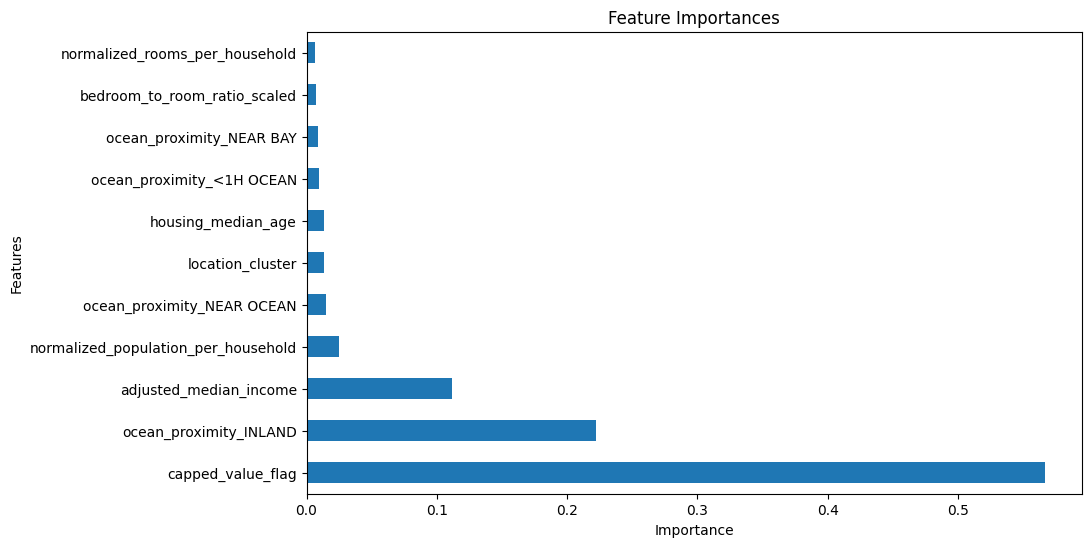

In [73]:
# Features importance bar plot
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='barh', title='Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [74]:
X.describe()

,housing_median_age,location_cluster,normalized_rooms_per_household,normalized_population_per_household,adjusted_median_income,capped_value_flag,bedroom_to_room_ratio_scaled
count,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,28.618702,1.141058,1.824309,1.347418,1.914087,0.048173,0.192135
std,12.596694,1.072267,0.208284,0.182795,0.450501,0.214139,0.047344
min,1.000000,0.000000,0.613104,0.559616,0.707036,0.000000,0.053535
25%,18.000000,0.000000,1.696028,1.231764,1.603309,0.000000,0.161573
50%,29.000000,1.000000,1.829267,1.339296,1.881250,0.000000,0.184698
75%,37.000000,1.000000,1.952690,1.454057,2.176258,0.000000,0.214644
max,52.000000,4.000000,2.432384,1.871350,3.872996,1.000000,0.693147


In [80]:
# Check the transformed X_train
print("X_train shape:", X_train.shape)

# Ensure feature_names matches the columns in X_train
if isinstance(X_train, pd.DataFrame):
    feature_names = X_train.columns.tolist()
else:
    # Manually define feature names if X_train is a numpy array
    feature_names = [
        'housing_median_age', 'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
        'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN', 'location_cluster',
        'normalized_rooms_per_household', 'normalized_population_per_household',
        'adjusted_median_income', 'capped_value_flag', 'bedroom_to_room_ratio_scaled'
    ]# Validate that the number of feature names matches the number of columns in X_train
assert len(feature_names) == X_train.shape[1], (
    f"Mismatch between feature names ({len(feature_names)}) and X_train columns ({X_train.shape[1]})!"
)

# Print the feature names for confirmation
print("Feature names:", feature_names)


X_train shape: (11558, 11)
Feature names: ['housing_median_age', 'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN', 'location_cluster', 'normalized_rooms_per_household', 'normalized_population_per_household', 'adjusted_median_income', 'capped_value_flag', 'bedroom_to_room_ratio_scaled']


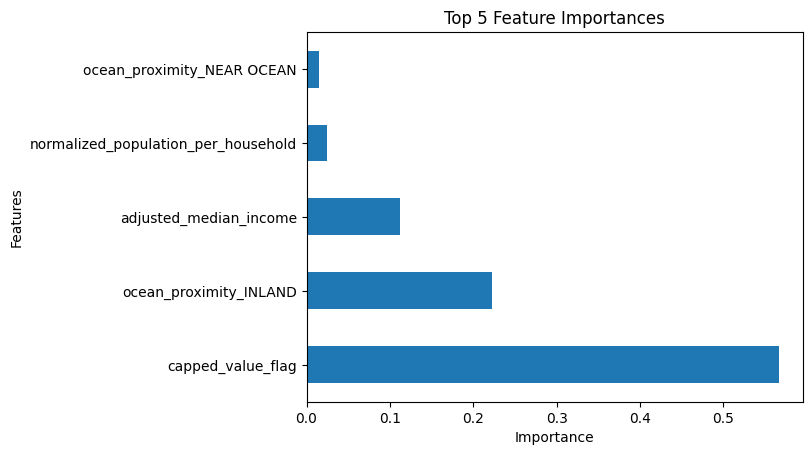

In [81]:
# Plot feature importances with correct feature names
feature_imp = pd.Series(
    best_model.feature_importances_,
    index=feature_names
).sort_values(ascending=False).head()

feature_imp.plot(kind='barh', title='Top 5 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# 5. Conclusion

* The model shows good predictive ability for the low to mid-range housing prices.
* The scatter plot demonstrates a positive correlation between actual and predicted values.
* Points cluster around the Perfect Prediction line, indicating the model has learned patterns well.
* Housing prices are right-skewed which means many lower-priced houses and very few high-priced houses.
* The dataset likely has too few expensive homes, which affects predictions for high prices.



# 6. Recommendation

* Apply log transformation to reduce skewness and improve predictions for high prices.
* Add more examples of expensive homes to help the model learn better.
* Feature Engineering, include new features like: Proximity to schools, hospitals, businesses, and local employment rates or crime rates.


In [82]:
# Export model using pickle
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

In [83]:
# Export scaler
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)